In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle

In [2]:
df_chicago = pd.read_csv('../dataset/chicago_2018.csv') 

df_chicago

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber
...,...,...,...,...,...,...,...,...
3603077,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber
3603078,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber
3603079,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber
3603080,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber


In [3]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603082 entries, 0 to 3603081
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 219.9+ MB


In [4]:
#Check number of rows
Lenght = len(df_chicago)
print("The dataset includes " + str(Lenght) + " entries.")

The dataset includes 3603082 entries.


In [5]:
#Drop duplicates and keep the last
df_chicago= df_chicago.drop_duplicates(keep='last')

In [6]:
#Check for duplicates
df_chicago[df_chicago.duplicated(keep=False)]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type


In [7]:
#Check for null values
df_chicago.isnull().sum()

start_time            0
end_time              0
start_station_id      0
end_station_id        0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
dtype: int64

In [8]:
#Define conditions if start_time is smaller than end_time
conditions = [df_chicago['end_time'] < df_chicago['start_time'],
              df_chicago['start_time'] < df_chicago['end_time'],
              df_chicago['start_time'] == df_chicago['end_time']]

#Define choices
choices=["Delete","Keep", "Delete"]

#Create new column in DataFrame that displays results of comparisons
df_chicago['result'] = np.select(conditions, choices, default='Tie')

#view result
df_chicago.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,Keep
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,Keep
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,Keep
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,Keep
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,Keep
5,2018-04-01 00:11:29,2018-04-01 00:22:28,244,325,Ravenswood Ave & Irving Park Rd,Clark St & Winnemac Ave (Temp),5962,Subscriber,Keep
6,2018-04-01 00:15:49,2018-04-01 00:19:47,128,130,Damen Ave & Chicago Ave,Damen Ave & Division St,4570,Subscriber,Keep
7,2018-04-01 00:17:00,2018-04-01 00:22:53,130,69,Damen Ave & Division St,Damen Ave & Pierce Ave,1323,Subscriber,Keep
8,2018-04-01 00:18:24,2018-04-01 00:23:06,130,69,Damen Ave & Division St,Damen Ave & Pierce Ave,1977,Subscriber,Keep
9,2018-04-01 00:20:00,2018-04-01 00:26:22,121,351,Blackstone Ave & Hyde Park Blvd,Cottage Grove Ave & 51st St,2602,Subscriber,Keep


In [9]:
#List of values with 'Delete' values
df_chicago.loc[df_chicago['result'] == 'Delete']

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result
2946870,2018-11-04 01:34:41,2018-11-04 01:12:43,188,333,Greenview Ave & Fullerton Ave,Ashland Ave & Blackhawk St,2398,Subscriber,Delete
2946876,2018-11-04 01:46:45,2018-11-04 01:06:53,54,259,Ogden Ave & Chicago Ave,California Ave & Francis Pl,5303,Subscriber,Delete
2946877,2018-11-04 01:48:12,2018-11-04 01:02:46,463,229,Clark St & Berwyn Ave,Southport Ave & Roscoe St,2334,Customer,Delete
2946878,2018-11-04 01:50:42,2018-11-04 01:01:53,453,325,Clark St & Schreiber Ave,Clark St & Winnemac Ave (Temp),3109,Subscriber,Delete
2946880,2018-11-04 01:53:16,2018-11-04 01:11:13,118,152,Sedgwick St & North Ave,Lincoln Ave & Diversey Pkwy,6462,Subscriber,Delete
2946881,2018-11-04 01:55:29,2018-11-04 01:14:56,73,172,Jefferson St & Monroe St,Rush St & Cedar St,1097,Subscriber,Delete
2946882,2018-11-04 01:59:57,2018-11-04 01:27:14,497,234,Kimball Ave & Belmont Ave,Clark St & Montrose Ave,1439,Subscriber,Delete


In [10]:
#Drop outliers with the value 'Delete'
df_chicago.drop(df_chicago[df_chicago['result']== 'Delete'].index, inplace = True)

In [11]:
#Check if 'Delete' values are removed
df_chicago.loc[df_chicago['result'] == 'Delete']

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result


In [12]:
df_chicago = df_chicago.drop(['result'], axis = 1)

In [13]:
#Check if every station_name is assigned to only one station_id and vice versa

df_id_time = df_chicago.sort_values(by=['start_time','bike_id'], ascending=True)

df_name_unique = df_id_time.groupby('start_station_name')['start_station_id'].nunique().reset_index()

df_id_unique = df_id_time.groupby('start_station_id')['start_station_name'].nunique().reset_index()

print(df_name_unique)
print(df_id_unique)

               start_station_name  start_station_id
0             2112 W Peterson Ave                 1
1                   63rd St Beach                 1
2               900 W Harrison St                 1
3      Aberdeen St & Jackson Blvd                 1
4         Aberdeen St & Monroe St                 1
..                            ...               ...
617           Wood St & Taylor St                 1
618        Woodlawn Ave & 55th St                 1
619        Woodlawn Ave & 75th St                 1
620  Woodlawn Ave & Lake Park Ave                 1
621          Yates Blvd & 75th St                 1

[622 rows x 2 columns]
     start_station_id  start_station_name
0                   2                   1
1                   3                   1
2                   4                   1
3                   5                   1
4                   6                   1
..                ...                 ...
616               660                   1
617             

In [14]:
#Check maximum number of station_id assigned to one station_name
print(df_name_unique.start_station_id.max())

1


In [15]:
#Check maximum number of station_names assigned to one station_id
print(df_id_unique.start_station_name.max())

2


In [16]:
df_id_unique[df_id_unique.start_station_name == 2]

,start_station_id,start_station_name
222,243,2


In [17]:
#There are more than 9000 rides involving this station
len(df_chicago.loc[df_chicago['start_station_id'] == 243]) + len(df_chicago.loc[df_chicago['end_station_id'] == 243])

9149

In [18]:
df_chicago[df_chicago['end_station_id'] == 243]['end_station_name'].unique()

array(['Lincoln Ave & Leavitt St', 'Lincoln Ave & Sunnyside Ave'],
      dtype=object)

Merge Lincoln Ave & Leavitt St and Lincoln Ave & Sunnyside Ave to Lincoln Ave & Sunnyside Ave

In [19]:
#Merge two start_station_name which are assigned to one start_station_id
df_chicago['start_station_name'] = df_chicago['start_station_name'].replace(
    'Lincoln Ave & Leavitt St',
    'Lincoln Ave & Sunnyside Ave'
)

In [20]:
#Merge two end_station_name which are assigned to one end_station_id
df_chicago['end_station_name'] = df_chicago['end_station_name'].replace(
    'Lincoln Ave & Leavitt St',
    'Lincoln Ave & Sunnyside Ave'
)

In [21]:
df_chicago[df_chicago['end_station_id'] == 243]['end_station_name'].unique()

array(['Lincoln Ave & Sunnyside Ave'], dtype=object)

In [22]:
#Check if every station_name is assigned to only one station_id and vice versa

df_id_time = df_chicago.sort_values(by=['start_time','bike_id'], ascending=True)

df_name_unique = df_id_time.groupby('start_station_name')['start_station_id'].nunique().reset_index()

df_id_unique = df_id_time.groupby('start_station_id')['start_station_name'].nunique().reset_index()

print(df_name_unique)
print(df_id_unique)

               start_station_name  start_station_id
0             2112 W Peterson Ave                 1
1                   63rd St Beach                 1
2               900 W Harrison St                 1
3      Aberdeen St & Jackson Blvd                 1
4         Aberdeen St & Monroe St                 1
..                            ...               ...
616           Wood St & Taylor St                 1
617        Woodlawn Ave & 55th St                 1
618        Woodlawn Ave & 75th St                 1
619  Woodlawn Ave & Lake Park Ave                 1
620          Yates Blvd & 75th St                 1

[621 rows x 2 columns]
     start_station_id  start_station_name
0                   2                   1
1                   3                   1
2                   4                   1
3                   5                   1
4                   6                   1
..                ...                 ...
616               660                   1
617             

In [23]:
#Check if every station_name is assigned to only one station_id
df_id_unique[df_id_unique.start_station_name == 2]

,start_station_id,start_station_name


In [24]:
#Check if every station_name is assigned to only one station_id and vice versa

df_id_time = df_chicago.sort_values(by=['end_time','bike_id'], ascending=True)

df_name_unique = df_id_time.groupby('end_station_name')['end_station_id'].nunique().reset_index()

df_id_unique = df_id_time.groupby('end_station_id')['end_station_name'].nunique().reset_index()

print(df_name_unique)
print(df_id_unique)

                 end_station_name  end_station_id
0             2112 W Peterson Ave               1
1                   63rd St Beach               1
2               900 W Harrison St               1
3      Aberdeen St & Jackson Blvd               1
4         Aberdeen St & Monroe St               1
..                            ...             ...
614           Wood St & Taylor St               1
615        Woodlawn Ave & 55th St               1
616        Woodlawn Ave & 75th St               1
617  Woodlawn Ave & Lake Park Ave               1
618          Yates Blvd & 75th St               1

[619 rows x 2 columns]
     end_station_id  end_station_name
0                 2                 1
1                 3                 1
2                 4                 1
3                 5                 1
4                 6                 1
..              ...               ...
614             660                 1
615             661                 1
616             662               

In [25]:
df_name_unique['end_station_id'].max()

1

In [26]:
df_id_unique['end_station_name'].max()

1

In [27]:
#Format the columns from datatype object to datatype datetime
df_chicago['start_time'] = pd.to_datetime(df_chicago['start_time'])
df_chicago['end_time'] = pd.to_datetime(df_chicago['end_time'])

In [28]:
#Calculate the duration time of each trip
df_chicago['duration_per_trip'] = df_chicago['end_time'] - df_chicago['start_time']

In [29]:
#Calculate total trip time in hours
df_chicago = df_chicago.assign(trip_time_in_hours=df_chicago.apply(lambda x: x['end_time'] - x['start_time'], axis=1) / pd.Timedelta(hours=1)
)

In [30]:
df_chicago.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_per_trip,trip_time_in_hours
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19,0.138611
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25,0.340278
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00,0.266667
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14,0.120556
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49,0.196944
5,2018-04-01 00:11:29,2018-04-01 00:22:28,244,325,Ravenswood Ave & Irving Park Rd,Clark St & Winnemac Ave (Temp),5962,Subscriber,0 days 00:10:59,0.183056
6,2018-04-01 00:15:49,2018-04-01 00:19:47,128,130,Damen Ave & Chicago Ave,Damen Ave & Division St,4570,Subscriber,0 days 00:03:58,0.066111
7,2018-04-01 00:17:00,2018-04-01 00:22:53,130,69,Damen Ave & Division St,Damen Ave & Pierce Ave,1323,Subscriber,0 days 00:05:53,0.098056
8,2018-04-01 00:18:24,2018-04-01 00:23:06,130,69,Damen Ave & Division St,Damen Ave & Pierce Ave,1977,Subscriber,0 days 00:04:42,0.078333
9,2018-04-01 00:20:00,2018-04-01 00:26:22,121,351,Blackstone Ave & Hyde Park Blvd,Cottage Grove Ave & 51st St,2602,Subscriber,0 days 00:06:22,0.106111


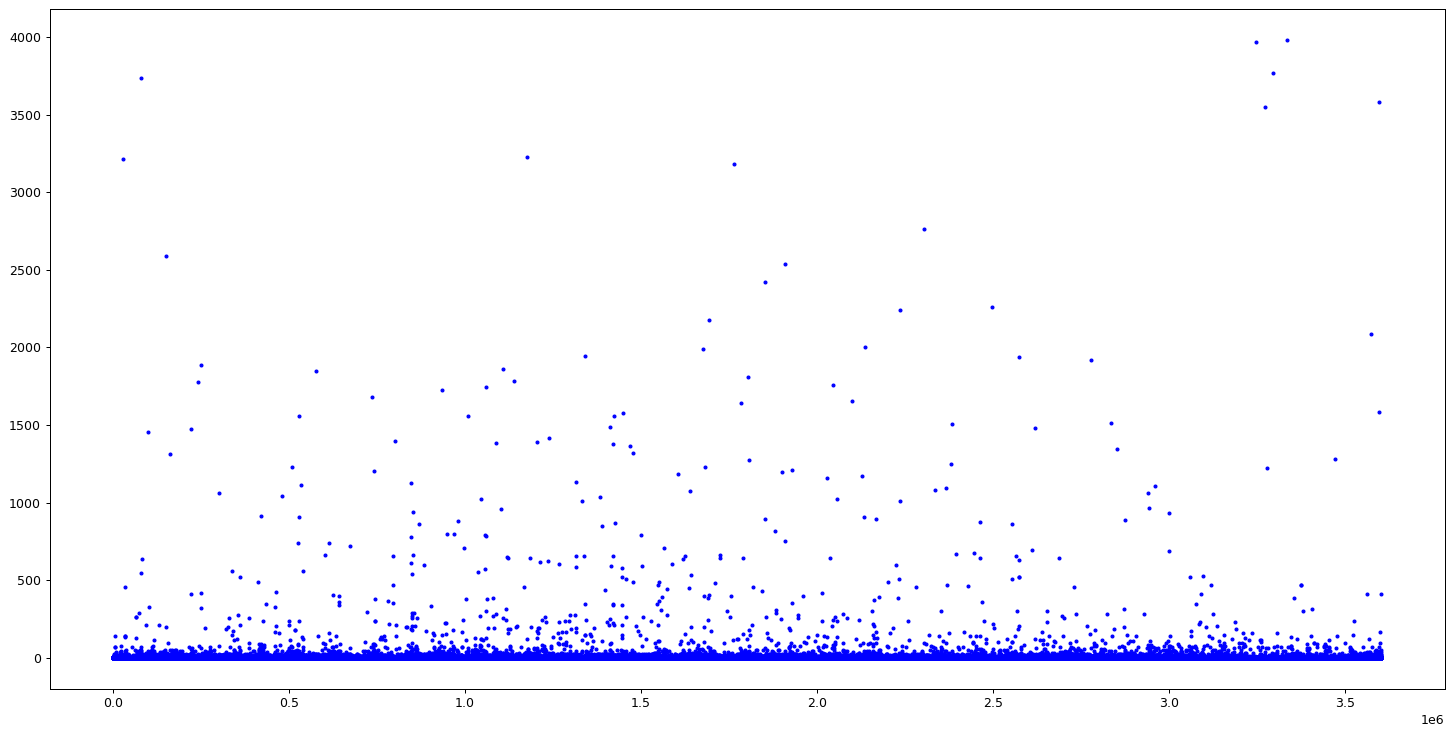

In [31]:
#Trip duration plot 
fig,ax = plt.subplots(figsize=(20,10), dpi= 90) 

label_font = {'labelsize':'10'}
axis_font = {'size':'35'}
dic={'fontsize': '25'}

ax.scatter(df_chicago.index, df_chicago['trip_time_in_hours'], s = 5, c = 'blue')

plt.show()

In [32]:
#Calculate 0.999 quantile of trip time
quantile = df_chicago['trip_time_in_hours'].quantile(0.999)
quantile

10.278806666667158

In [33]:
#0.1% or 3604 values are above the quantile
len(df_chicago.loc[df_chicago['trip_time_in_hours'] > quantile])

3604

In [34]:
df_chicago_quantile = df_chicago.loc[df_chicago['trip_time_in_hours'] < quantile]

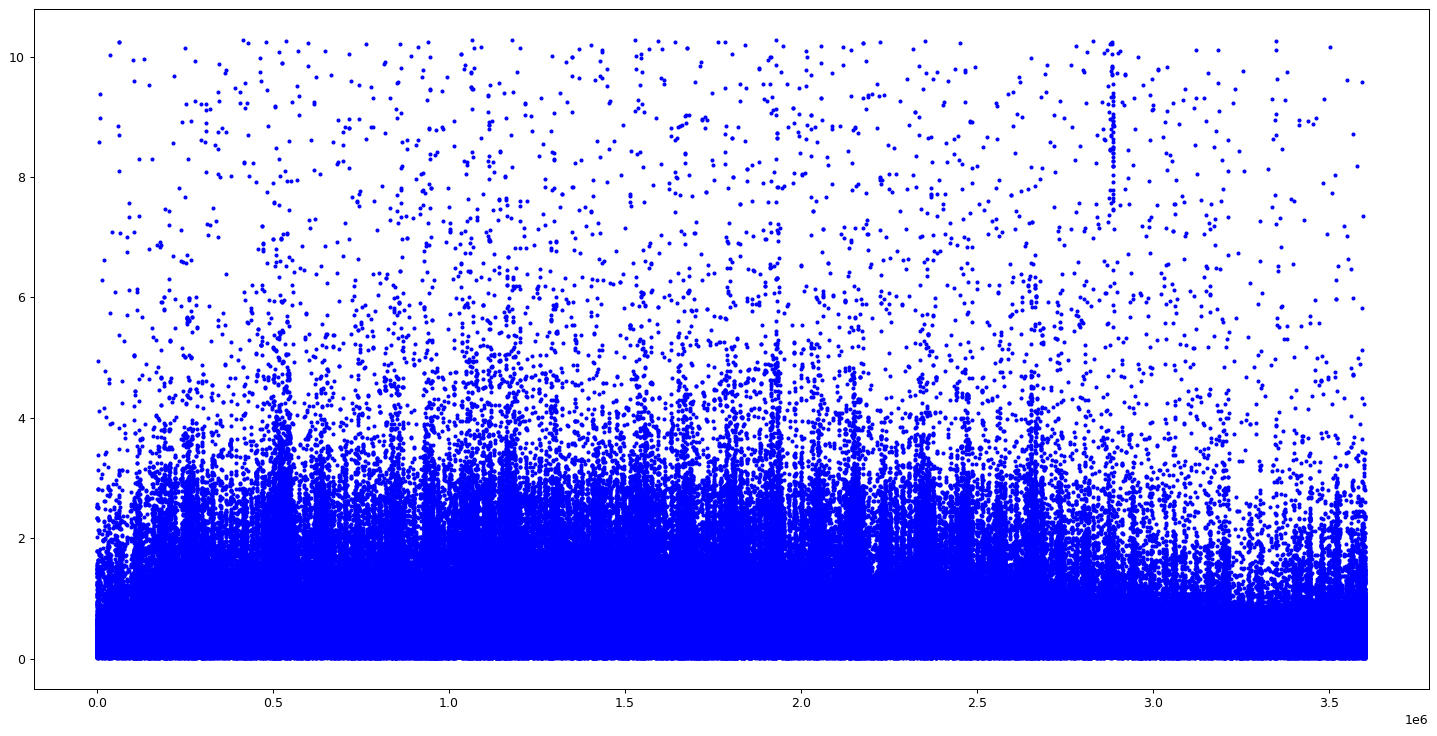

In [35]:
#Trip duration plot 
fig,ax = plt.subplots(figsize=(20,10), dpi= 90) 

label_font = {'labelsize':'10'}
axis_font = {'size':'35'}
dic={'fontsize': '25'}

ax.scatter(df_chicago_quantile.index, df_chicago_quantile['trip_time_in_hours'], s = 5, c = 'blue')

plt.show()

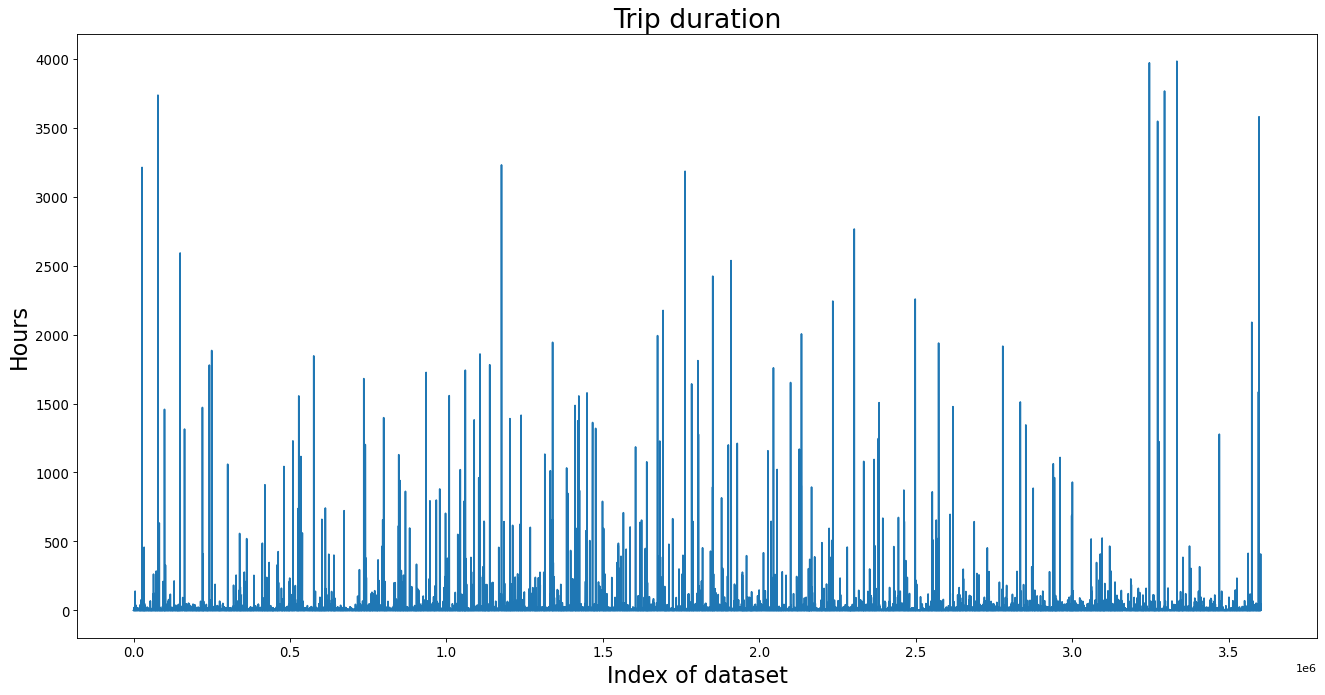

In [36]:
#plot trip duration
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}

ax.plot(df_chicago['trip_time_in_hours'], color = 'tab:blue')
ax.set_title("Trip duration", dic)
ax.set_ylabel('Hours',**axis_font)
ax.set_xlabel('Index of dataset',**axis_font)
ax.tick_params(axis='both', **label_font)
plt.show()

In [37]:
#Check number of entries for current dataframe and the new dataframe with 0.999 quantile
print(len(df_chicago))
print(len(df_chicago_quantile))

3603075
3599471


In [38]:
#Continue with new Dataframe
df_chicago = df_chicago_quantile

In [39]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599471 entries, 0 to 3603081
Data columns (total 10 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   duration_per_trip   timedelta64[ns]
 9   trip_time_in_hours  float64        
dtypes: datetime64[ns](2), float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 302.1+ MB


In [40]:
#Check trip length to exclude potential outliers
df_chicago.sort_values(by=["duration_per_trip"], ascending=False).head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_per_trip,trip_time_in_hours
414469,2018-05-19 01:10:15,2018-05-19 11:26:55,96,97,Desplaines St & Randolph St,Field Museum,5070,Customer,0 days 10:16:40,10.277778
1929665,2018-08-19 07:21:20,2018-08-19 17:37:52,85,291,Michigan Ave & Oak St,Wells St & Evergreen Ave,2208,Customer,0 days 10:16:32,10.275556
1527996,2018-07-27 23:11:49,2018-07-28 09:28:03,119,158,Ashland Ave & Lake St (Temp),Milwaukee Ave & Wabansia Ave,5741,Customer,0 days 10:16:14,10.270556
1179810,2018-07-08 10:46:15,2018-07-08 21:02:24,356,356,Stony Island Ave & 71st St,Stony Island Ave & 71st St,2296,Customer,0 days 10:16:09,10.269167
1064327,2018-07-01 12:57:59,2018-07-01 23:14:05,567,567,May St & 69th St,May St & 69th St,3306,Subscriber,0 days 10:16:06,10.268333
2829409,2018-10-23 11:50:07,2018-10-23 22:06:06,291,118,Wells St & Evergreen Ave,Sedgwick St & North Ave,2341,Subscriber,0 days 10:15:59,10.266389
1592681,2018-07-31 11:22:27,2018-07-31 21:38:18,34,265,Cannon Dr & Fullerton Ave,Cottage Grove Ave & Oakwood Blvd,2062,Customer,0 days 10:15:51,10.264167
535373,2018-05-28 01:52:52,2018-05-28 12:08:40,13,13,Wilton Ave & Diversey Pkwy,Wilton Ave & Diversey Pkwy,953,Customer,0 days 10:15:48,10.263333
3349347,2018-02-11 21:07:27,2018-02-12 07:23:14,188,153,Greenview Ave & Fullerton Ave,Southport Ave & Wellington Ave,3641,Subscriber,0 days 10:15:47,10.263056
2352864,2018-09-15 21:36:29,2018-09-16 07:51:48,6,32,Dusable Harbor,Racine Ave & Congress Pkwy,6281,Customer,0 days 10:15:19,10.255278


In [41]:
#Drop rows who started or ended biketrip before and after 2018 
df_chicago.drop(df_chicago[df_chicago['start_time'] < '2018-01-01 00:00:00'].index, inplace = True)
df_chicago.drop(df_chicago[df_chicago['end_time'] > '2018-12-31 23:59:59'].index, inplace = True)

In [42]:
len(df_chicago)

3599468

In [43]:
df_chicago['duration_per_trip'].describe()

count                      3599468
mean     0 days 00:17:40.347873908
std      0 days 00:23:23.602598277
min                0 days 00:01:01
25%                0 days 00:06:34
50%                0 days 00:11:12
75%                0 days 00:20:07
max                0 days 10:16:40
Name: duration_per_trip, dtype: object

In [44]:
#Check if for every bike_id only one ride is happening at the same time

df_bike_id = df_chicago.sort_values(by=['bike_id','start_time'], ascending=True)
x_chicago = df_bike_id[['start_time','end_time', 'bike_id']]

#Add columns next_ride and next_bike 
x_chicago = x_chicago.assign(next_bike_id=0)
x_chicago['next_bike']= x_chicago['bike_id'].shift(periods=-1)
x_chicago = x_chicago.assign(next_ride_start=0)
x_chicago['next_ride']= x_chicago['start_time'].shift(periods=-1)

In [45]:
#Compare if next trip is with the same bike
x_chicago['compare_id'] = x_chicago.apply(lambda x: True if ((x['bike_id'] == x['next_bike'])) else False, axis=1)

#Drop last row because of nan
x_chicago = x_chicago.dropna() 

x_chicago['check'] = x_chicago.apply(lambda x: True if ((x['next_ride'] >= x['end_time'])) else False, axis=1)

#Find wrong entrys 
df_trips_at_same_time = x_chicago[(x_chicago['check']==False)&(x_chicago['compare_id']==True)]

print('Wrong entrys: '+str(len(df_trips_at_same_time)))

Wrong entrys: 7


In [46]:
#Display wrong entries
print('Entrys before this drop: ' + str(len(df_chicago)))
same_time = list(df_trips_at_same_time.index)
same_time
print(same_time)

Entrys before this drop: 3599468
[298904, 1369725, 2616557, 1302497, 3415934, 2654015, 1169398]


In [47]:
#Drop wrong entries
df_chicago = df_chicago.drop(same_time)

In [48]:
print('Entrys after this drop: ' + str(len(df_chicago)))

Entrys after this drop: 3599461


In [49]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599461 entries, 0 to 3603081
Data columns (total 10 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   duration_per_trip   timedelta64[ns]
 9   trip_time_in_hours  float64        
dtypes: datetime64[ns](2), float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 302.1+ MB


In [50]:
#Export dataset
df_chicago.to_csv(r'../dataset/chicago_2018_clean.csv', index = False)